<a href="https://colab.research.google.com/github/pyellama/assignment2/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load the Data and Fix Data Types**

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
# Inspect the first few rows and data types
print(data.info())
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Confirm the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    f

**Step 2: Split the Data into Training and Testing Sets**

In [5]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test_data.shape}")

Training set shape: (298, 9)
Testing set shape: (100, 9)


**Step 3: Visualize the Data using Plotly**

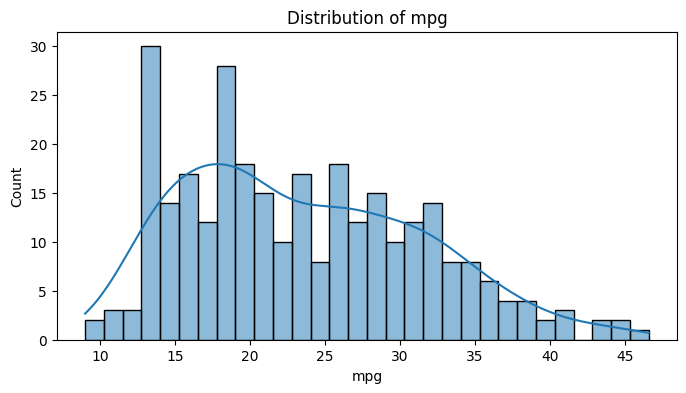

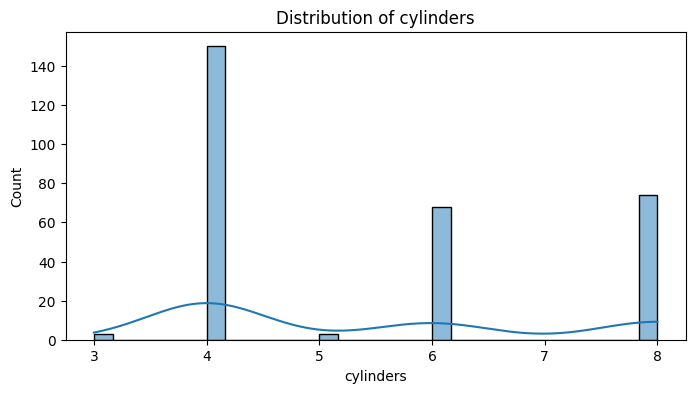

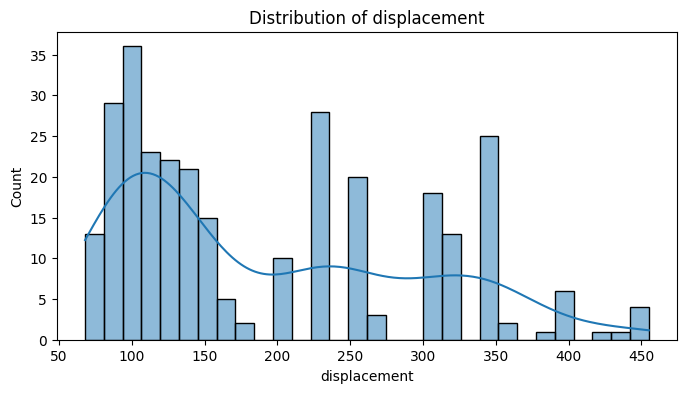

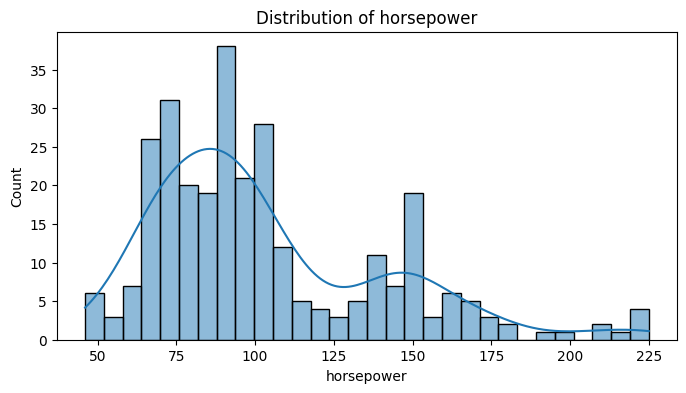

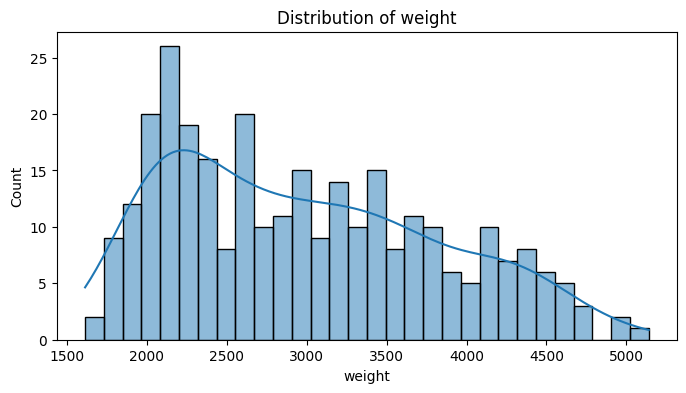

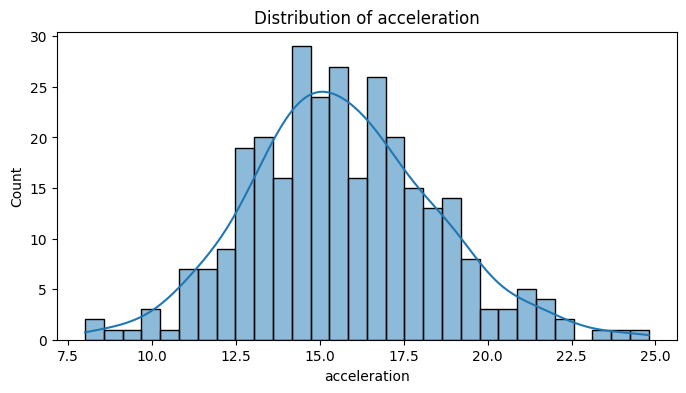

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric and categorical columns
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
categorical_columns = ['origin', 'model year']

# Visualizing numeric columns using histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

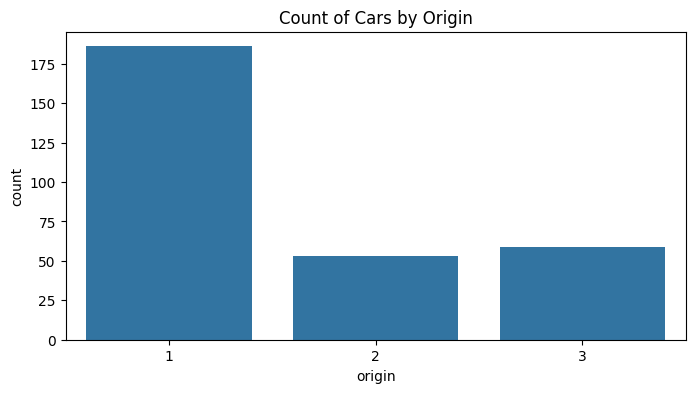

In [23]:
# Visualizing the categorical column 'origin' using bar plots
plt.figure(figsize=(8, 4))
sns.countplot(x='origin', data=train_data)
plt.title('Count of Cars by Origin')
plt.show()

# After visual inspection, we categorize columns as:
symmetric_columns = ['mpg', 'acceleration']
skewed_columns = ['displacement', 'horsepower', 'weight', 'cylinders']
categorical_columns = ['origin', 'model year']

**Step 4: Build the Processing Pipeline**

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

# Pipeline for symmetric numeric columns: Imputation -> Standardization
numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for skewed numeric columns: Imputation -> Log Transformation -> Standardization
numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

# Pipeline for categorical columns: Imputation -> One Hot Encoding
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single ColumnTransformer
full_pipeline = ColumnTransformer([
    ('numeric_symmetric', numeric_symmetric_pipeline, symmetric_columns),
    ('numeric_skewed', numeric_skewed_pipeline, skewed_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

# Train the pipeline on the training data and apply transformations
train_prepared = full_pipeline.fit_transform(train_data)
test_prepared = full_pipeline.transform(test_data)

print(f"Processed training data shape: {train_prepared.shape}")
print(f"Processed testing data shape: {test_prepared.shape}")


Processed training data shape: (298, 22)
Processed testing data shape: (100, 22)


**Step 5: Visualizations using Plotly**

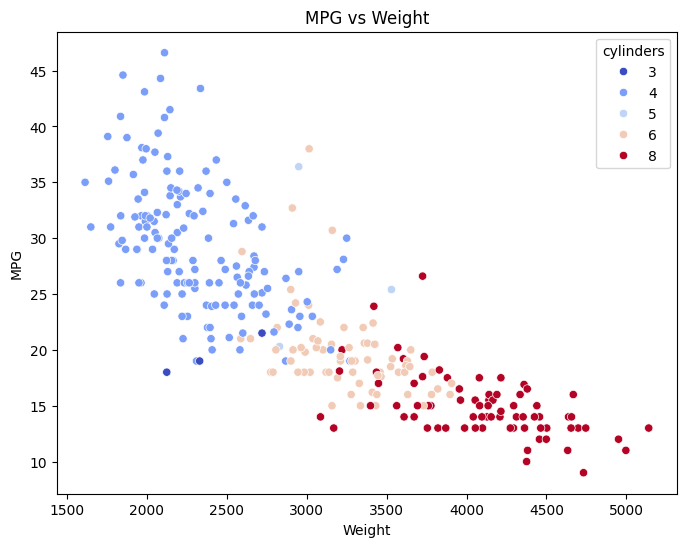

In [24]:
# Scatter plot for MPG vs Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='mpg', hue='cylinders', data=train_data, palette='coolwarm')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()



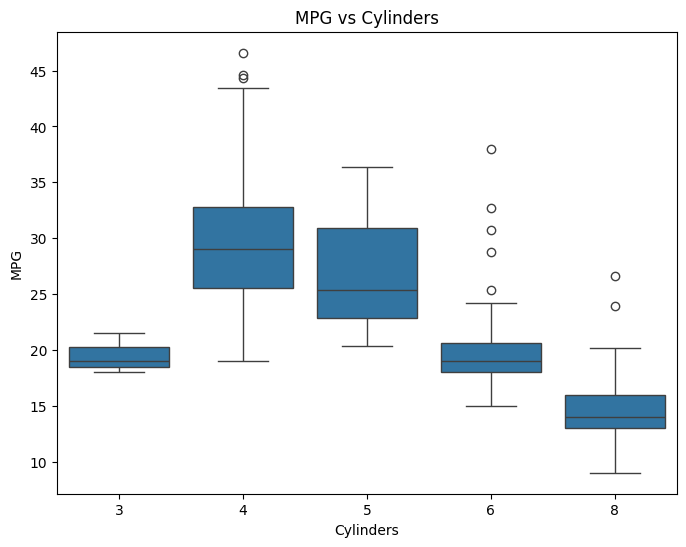

In [25]:
# Box plot for MPG across different Cylinders
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=train_data)
plt.title('MPG vs Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()


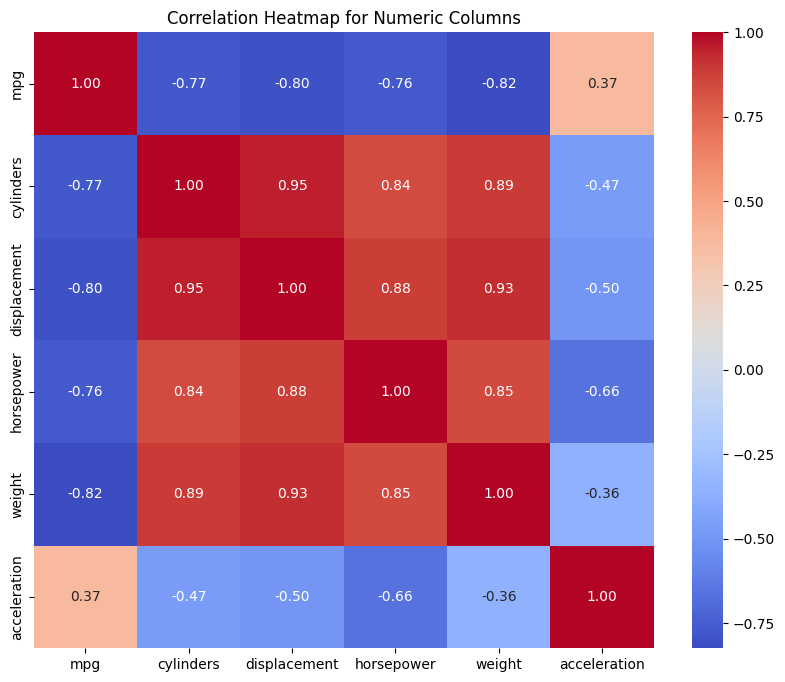

In [26]:
#  Correlation heatmap between numeric columns
plt.figure(figsize=(10, 8))
corr_matrix = train_data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


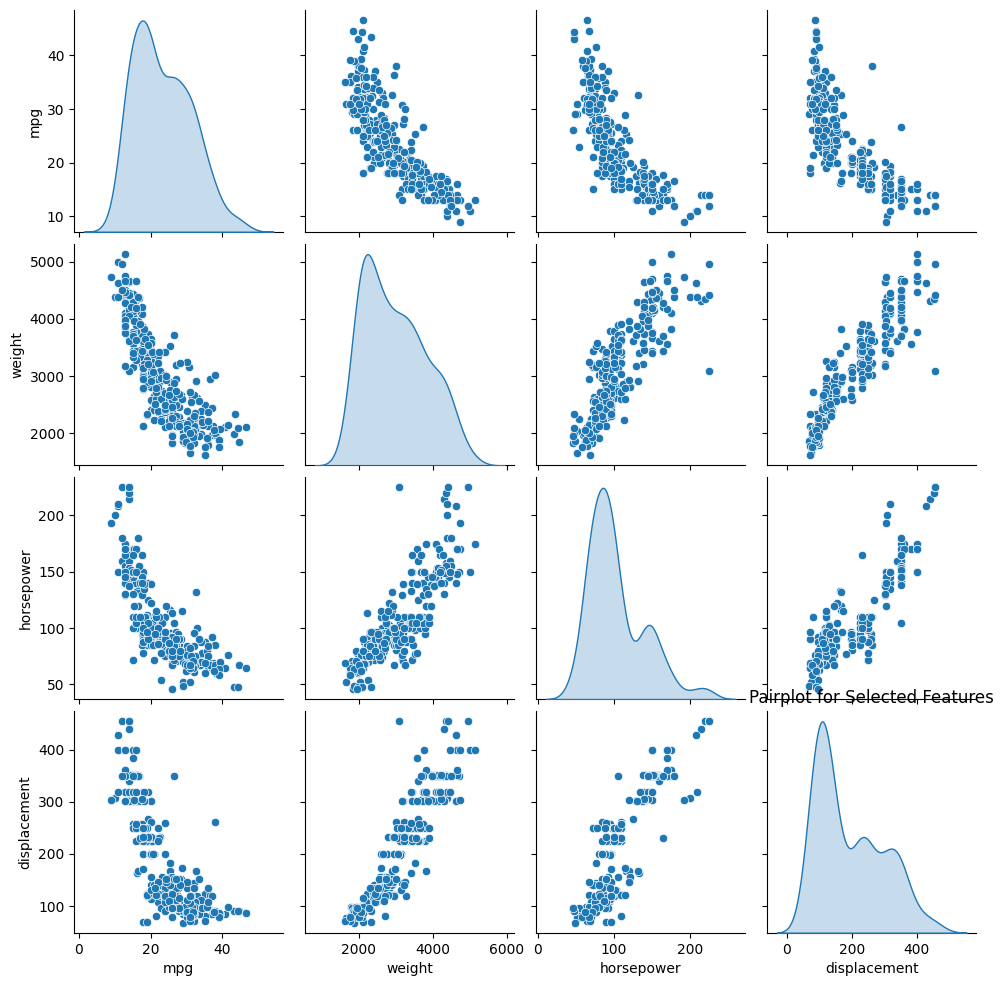

In [29]:
# Pairplot-style relationship using Plotly
sns.pairplot(train_data[['mpg', 'weight', 'horsepower', 'displacement']].dropna(), diag_kind='kde')
plt.title('Pairplot for Selected Features')
plt.show()


**Step 6: Final Output**

In [19]:
print(f"Final processed training data shape: {train_prepared.shape}")
print(f"Final processed testing data shape: {test_prepared.shape}")

Final processed training data shape: (298, 22)
Final processed testing data shape: (100, 22)


In [21]:
# Save final csv
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)